<a href="https://colab.research.google.com/github/MpRonald/Deep-Learning/blob/main/Neural_Networks_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [2]:
bike = pd.read_csv('https://github.com/MpRonald/datasets/raw/main/bike-sharing-daily.csv')
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796


In [3]:
bike.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
hum,731.0,0.627894,0.142429,0.000000,0.520000,0.626667,0.730209,0.972500


In [4]:
bike.isnull().sum(), bike.duplicated().sum()

(instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64, 0)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


In [6]:
bike = bike.drop(labels=['instant'], axis=1)

In [7]:
bike = bike.drop(labels=['casual', 'registered'], axis=1)

In [8]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [9]:
bike[['dteday']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dteday  731 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [10]:
bike.dteday = pd.to_datetime(bike.dteday, format='%m/%d/%Y')
bike[['dteday']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dteday  731 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB


In [11]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [12]:
# changing index
bike.index = pd.DatetimeIndex(bike.dteday)
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,,
2011-01-01,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [13]:
bike = bike.drop(labels=['dteday'], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


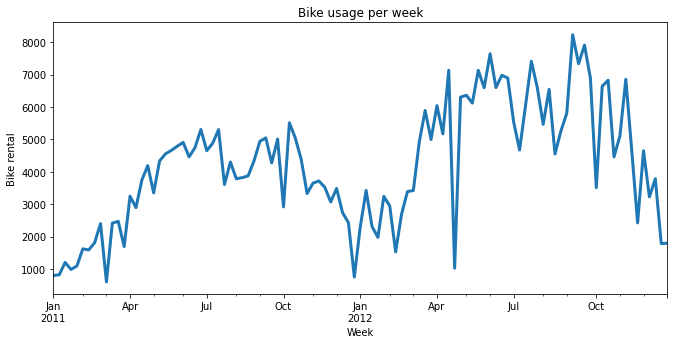

In [14]:
plt.figure(figsize=(11,5))
bike['cnt'].asfreq('W').plot(linewidth=3)
plt.title('Bike usage per week')
plt.xlabel('Week')
plt.ylabel('Bike rental');

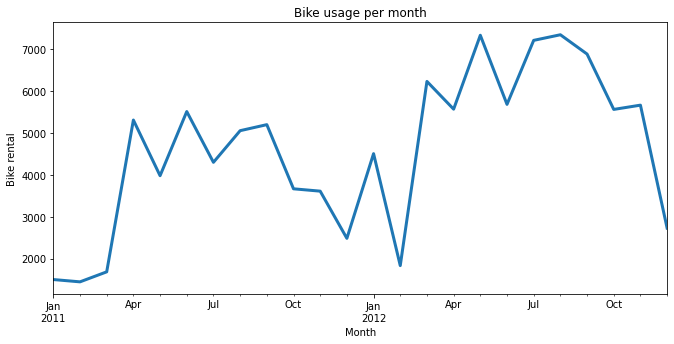

In [15]:
plt.figure(figsize=(11,5))
bike['cnt'].asfreq('M').plot(linewidth=3)
plt.title('Bike usage per month')
plt.xlabel('Month')
plt.ylabel('Bike rental');

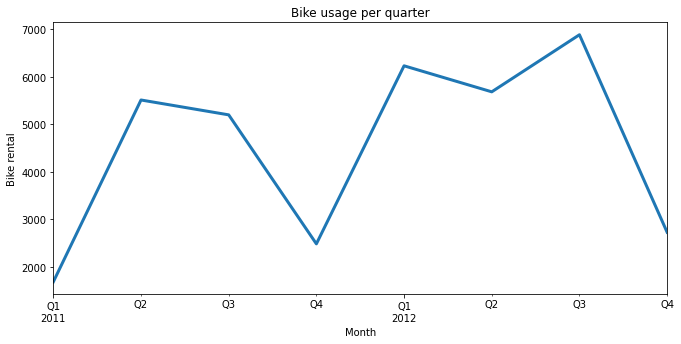

In [16]:
plt.figure(figsize=(11,5))
bike['cnt'].asfreq('Q').plot(linewidth=3)
plt.title('Bike usage per quarter')
plt.xlabel('Month')
plt.ylabel('Bike rental');

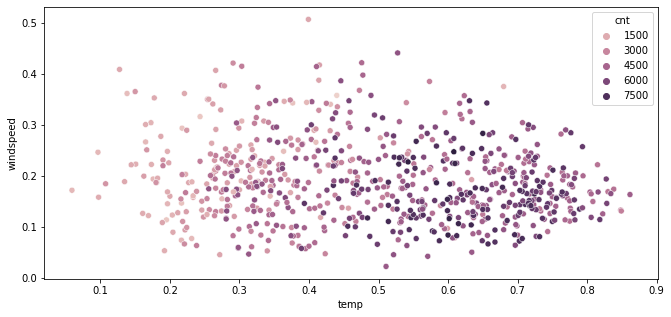

In [17]:
plt.figure(figsize=(11,5))
sns.scatterplot(x=bike.temp, y=bike.windspeed, hue=bike.cnt);

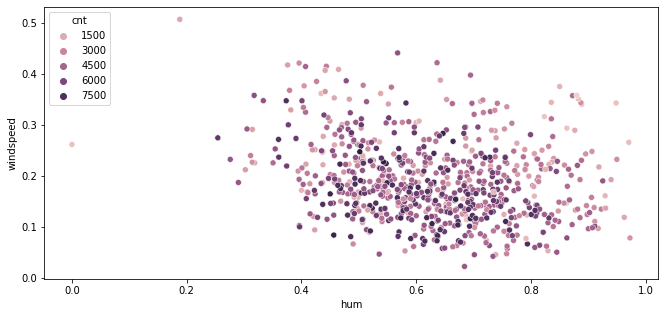

In [18]:
plt.figure(figsize=(11,5))
sns.scatterplot(x=bike.hum, y=bike.windspeed, hue=bike.cnt);

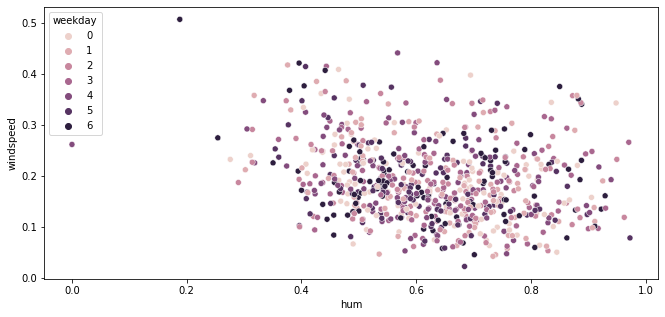

In [19]:
plt.figure(figsize=(11,5))
sns.scatterplot(x=bike.hum, y=bike.windspeed, hue=bike.weekday);

In [20]:
X_num = bike[['temp', 'hum', 'windspeed', 'cnt']]

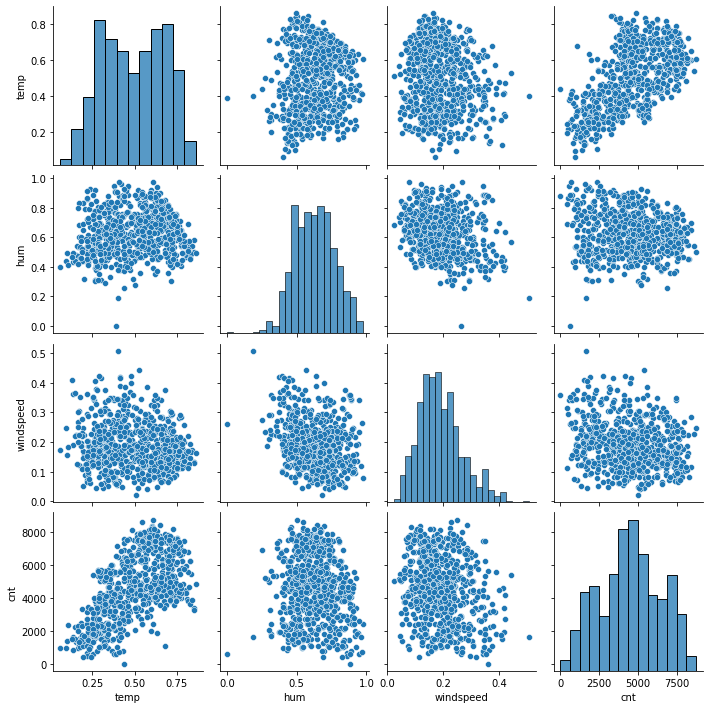

In [21]:
sns.pairplot(X_num);

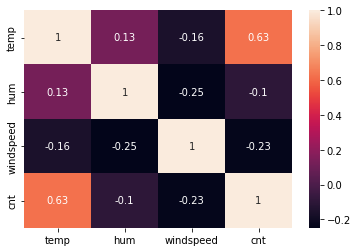

In [22]:
sns.heatmap(X_num.corr(), annot=True);

In [23]:
X_cat = bike[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]

In [24]:
onehot = OneHotEncoder()
X_cat = onehot.fit_transform(X_cat).toarray()
X_cat.shape

(731, 32)

In [25]:
X_cat = pd.DataFrame(X_cat)
X_cat.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [26]:
X_num = X_num.reset_index()
X_all = pd.concat([X_cat, X_num], axis=1)
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,dteday,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2011-01-01,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2011-01-02,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-03,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-04,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-05,0.226957,0.436957,0.186900,1600


In [27]:
X_all = X_all.drop(labels=['dteday'], axis=1)
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,0.436957,0.186900,1600


In [28]:
X = X_all.iloc[:,:-1].values
y = X_all.iloc[:,-1:].values
X.shape, y.shape

((731, 35), (731, 1))

In [29]:
scaler = MinMaxScaler()
scaler.fit_transform(y)
y = scaler.transform(y)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((584, 35), (147, 35), (584, 1), (147, 1))

In [31]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(35,)))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3600      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 23,901
Trainable params: 23,901
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
19/19 [==============================] - 1s 9ms/step - loss: 0.0668 - val_loss: 0.0158
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0151 - val_loss: 0.0098
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0092 - val_loss: 0.0133
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0082 - val_loss: 0.0090
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0068 - val_loss: 0.0103
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0065 - val_loss: 0.0106
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0097
Epoch 8/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0104
Epoch 9/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0097
Epoch 10/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0099
Epoch 11/

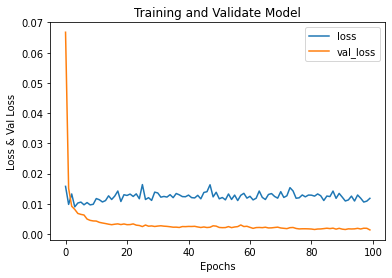

In [33]:
model.compile(optimizer='Adam', loss='mean_squared_error')
epochs_bike = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)
plt.title('Training and Validate Model')
plt.xlabel('Epochs')
plt.ylabel('Loss & Val Loss')
sns.lineplot(data=epochs_bike.history['val_loss'])
sns.lineplot(data=epochs_bike.history['loss'])
plt.legend(['loss', 'val_loss']);

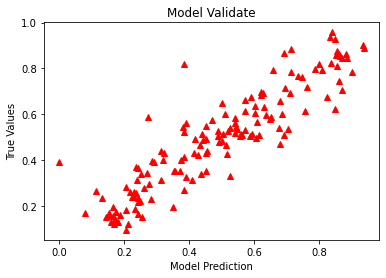

In [34]:
y_pred = model.predict(X_test)
plt.title('Model Validate')
plt.xlabel('Model Prediction')
plt.ylabel('True Values')
plt.plot(y_test, y_pred, "^", color='r');

In [35]:
y_pred_rev = scaler.inverse_transform(y_pred)
y_test_rev = scaler.inverse_transform(y_test)

In [36]:
y_pred_rev

array([[5362.3394],
       [1563.2755],
       [3704.786 ],
       [4442.0073],
       [7439.8535],
       [8164.8613],
       [1155.4735],
       [2991.4019],
       [6509.458 ],
       [6921.5796],
       [1626.5132],
       [1754.3268],
       [4498.7607],
       [5548.7437],
       [1938.4666],
       [2044.7722],
       [1648.8916],
       [7862.6753],
       [4444.191 ],
       [2453.812 ],
       [7520.0464],
       [6058.137 ],
       [6074.311 ],
       [1079.3823],
       [ 868.7286],
       [4422.4775],
       [1486.4496],
       [7470.67  ],
       [4481.518 ],
       [5206.523 ],
       [2750.9482],
       [4296.767 ],
       [6048.077 ],
       [7531.931 ],
       [5740.547 ],
       [7147.7646],
       [6153.192 ],
       [6231.1323],
       [3434.803 ],
       [1354.8403],
       [3082.416 ],
       [4810.0103],
       [7386.7124],
       [4464.8584],
       [7147.6855],
       [1500.8672],
       [5244.9673],
       [4356.0723],
       [7545.9424],
       [5357.2383],


In [37]:
y_test_rev

array([[6606.],
       [1550.],
       [3747.],
       [6041.],
       [7538.],
       [7264.],
       [1605.],
       [2209.],
       [7499.],
       [5743.],
       [1796.],
       [3068.],
       [4891.],
       [5260.],
       [2133.],
       [2471.],
       [2046.],
       [8156.],
       [5362.],
       [2298.],
       [7697.],
       [5463.],
       [5409.],
       [1872.],
       [1807.],
       [5130.],
       [2121.],
       [7436.],
       [3830.],
       [5557.],
       [2743.],
       [3644.],
       [6196.],
       [7494.],
       [5918.],
       [3372.],
       [7582.],
       [6053.],
       [2566.],
       [1263.],
       [3944.],
       [3956.],
       [7580.],
       [4906.],
       [6966.],
       [ 705.],
       [4458.],
       [5298.],
       [6043.],
       [4996.],
       [3351.],
       [2431.],
       [1011.],
       [4475.],
       [4725.],
       [4727.],
       [2395.],
       [3351.],
       [4788.],
       [7175.],
       [6153.],
       [7442.],
       [

In [38]:
# adjusted R2
k = X_test.shape[1]
n = len(X_test)
mae = mean_absolute_error(y_test_rev, y_pred_rev) 
mse = mean_squared_error(y_test_rev, y_pred_rev)
rmse = sqrt(mse) # root mean squared error
r2 = r2_score(y_test_rev, y_pred_rev)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [39]:
print("MAE: ", mae, "\nMSE: ", mse, "\nRMSE: ", rmse, "\nR2: ", r2, "\nADJ R2: ", adj_r2)

MAE:  607.6706713202859 
MSE:  729279.4188186302 
RMSE:  853.9785821779316 
R2:  0.8181294695619963 
ADJ R2:  0.7607829059103735
